In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Para crear procesos
import os

# Para trabajar con arrelgos numpy, una herramienta potente para todo lo que es 
# calculo numerico
import numpy as np 

#Para graficar
import matplotlib.pyplot as plt

# Para trabajar con datasets, se usa mucho para analisis de datos
import pandas as pd

In [4]:
def plot(threads, time, std, filtro):

    fig, ax = plt.subplots()
    ax.plot(threads, time, 'b-', color='green')
    if np.any(std) != 0:
        ax.fill_between(threads, time-std, time+std, color='red')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance ' + filtro + ' multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [ ]:
! unzip "/content/drive/My Drive/TP2-IMAGINE.zip"

In [6]:
! cd TP2-IMAGINE/src/;g++ -pthread -O3 -march=native -o main main.cpp ppm.cpp filters.cpp

In [127]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; ./main brightness " + str(threads) + " 0.14 2 imgs/astro.ppm out/salida.ppm"
  for i in range(14):
    os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

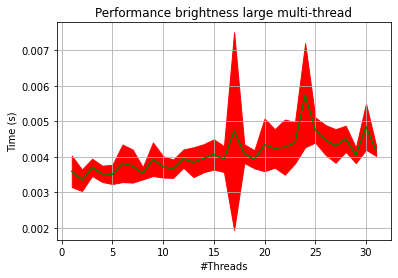

Max Gain: 1.0752609960636659 %


In [128]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'brightness large' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")


BRIGHTNESS

¿Qué se puede decir sobre la performance del filtro en función de la cantidad de threads utilizados?

 Se puede ver en los graficos como puede parecer que con mas threads no cambie la gran cosa, o peor aun, que sea aun peor que con un simple thread, pero esto es debido a que google collab simplemente tiene 2 nucleos, por lo cual limita gravemente  los experimentos que podemos realizar. Mas alla de eso se puede ver como para los primeros threads se empieza a mejorar el tiempo, sumandole la teoria de que es una imagen de 1920x1080, se puede teorizar que cuantos mas threads se agreguen el tiempo deberia de disminuir.





In [125]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; ./main brightness " + str(threads) + " 0.14 2 imgs/sign_2.ppm out/salida.ppm"
  for i in range(14):
    os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

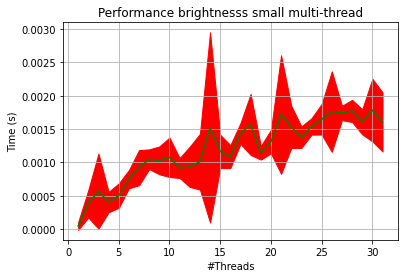

Max Gain: 0 %


In [126]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'brightnesss small' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")

In [78]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; ./main brightness " + str(threads) + " 0.14 2 imgs/arabia.ppm out/salida.ppm"
  for i in range(14):
    os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

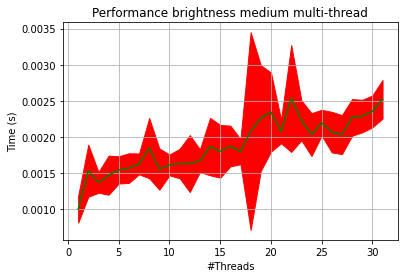

Max Gain: 0 %


In [79]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'brightness medium' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")

GRANDE VS. CHICO

¿Qué impacto tiene considerar imágenes "grandes" en lugar de imágenes "chicas"?

Como mencionamos anteriormente, la principal diferencia es que con las imagenes chicas, cuando se intenta separar la imagen en threads, se termina tardando mas en crear estos threads que en que cada thread haga su parte del trabajo. A diferencia de imagenes mas grandes donde muchos threads puede significar mayores cambios.Esto se puede ver con los experimentos que hicimos donde la imagen grande es de 1920x1080, la mediana de 1000x500 y la chica de 99x99. 
Esto hizo que lleguemos a la conclusion de que cuanto mas grande la imagen( o el proceso) se puede dividir en mas threads.

¿Cuán determinante es la configuración de hardware donde se corren los experimentos y como puede relacionarse con lo observado?

Es bastante importante el hardware ya que la paralelizacion de tareas sirve mas o menos para cada computadora y sus nucleos. En nuestro caso usamos colab google el cual nos permite usar un procesador con 2 nucleos, esto significa que hacer mas que 2 threads determina que el procesador empieza a alternar entre los threads y no es 100% paraleo.
Esto se puede ver con el brightness en imagen grande, la cual, teoricamente, deberia de ir mejorando el tiempo con los threads, pero debido al procesador de 2 nucleos, parece que empeoraria.

Llegariamos a la conclusion que diferentes experimentos pueden parecer diferentes de acuerdo al hardware en el cual se corre, por lo cual decidimos que es muy importante.

In [109]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; ./main edgeDetection " + str(threads) + " 0.14 2 imgs/arabia.ppm out/salida.ppm"
  for i in range(14):
    os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

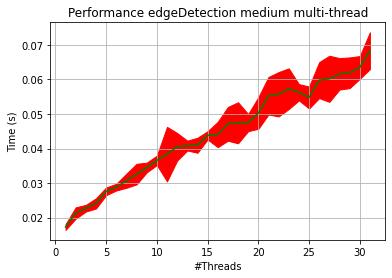

Max Gain: 0 %


In [110]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'edgeDetection medium' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")

In [97]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main edgeDetection " + str(threads) +  " 0.14 imgs/astro.ppm out/salida.ppm 0"
  for i in range(14):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

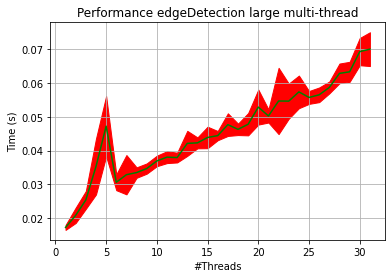

Max Gain: 0 %


In [100]:
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'edgeDetection large' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")

In [107]:
f = open("TP2-IMAGINE/test/resultados.csv", "w+")
f.truncate()
f.close()
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main edgeDetection " + str(threads) +  " 0.14 imgs/sign_2.ppm out/salida.ppm 0"
  for i in range(14):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

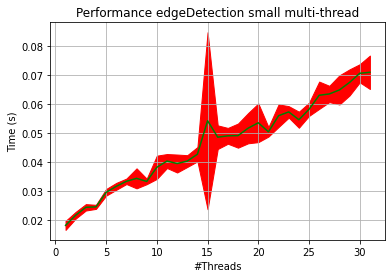

Max Gain: 0 %


In [108]:
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'edgeDetection small' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
speedup = df_mean_time[1]/min
if speedup == 1:
  speedup = 0
print("Max Gain:" , speedup ,"%")

DIFERENTES MULTI-THREADS

¿Hay diferencias de performance para los distintos tipos de filtros Multi-thread?

Por lo visto en los experimentos es claro que hay una diferencia, comparando edge detection y brightness, mientras que brightness en casos de imagenes grandes puede llegar a servir hacer multithread, para edge detection no parece que sea mejor multithread, sin importar el tamaño de la imagen. Ademas que la diferencia entre el primer y ultimo thread en brightness es minima comparada con la del primer y ultimo thread en edge detection.

Llegamos a la conclusion de que los tiempos del edge detection no tiene que ver con el tamaño de la imagen debido a que el grafico siempre sigue la misma "ruta"(empieza en 0.02 y termina en 0.07), sino completamente con la cantidad de threads, lo cual se llega a la conclusion de que siempre va a tardar lo mismo el programa sin importar el tamaño de la imagen.

SIEMPRE PARALELIZAR

¿siempre es conveniente paralelizar?

Depende completamente de lo que se este pensando paralelizar, como vimos en experimentos anteriores, hay ciertos programas o tareas que no convienen correr con multithreads, o tambien puede depender del hardware, por lo cual decidimos que es muy subjetivo para cada caso.

¿De qué factores de la entrada depende esto?

Dependen, en este caso, del tamaño de la imagen, del tipo de programa que se corre, de la cantidad de threads 